# Módulo 3: Ejercicio de evaluación final

Por Julia Marín Salas

In [95]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Prueba Estadística
# -----------------------------------------------------------------------
import scipy.stats as stats  # para poder hacer la prueba de hipótesis

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") # descartamos los warnings

##  FASE 1: EXPLORACIÓN Y LIMPIEZA DE DATOS

LECTURA Y EXPLORACIÓN GENERAL DE LOS DATASETS

In [76]:
# Creamos una función para cargar los datos de los datasets
# -----------------------------------------------------------------------
def load_data(path):
    return pd.read_csv(path)

# Cargamos los datos del primer dataset
# -----------------------------------------------------------------------
path_flight = './Customer Flight Activity (1).csv'
customer_flight = load_data(path_flight)
customer_flight.head() # visualizamos las primeras filas

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [ ]:
# Visualizamos los ultimos registros del primer fichero 
# -----------------------------------------------------------------------
customer_flight.tail()

In [77]:
# Cargamos los datos del segundo dataset
# -----------------------------------------------------------------------
path_loyalty = './Customer Loyalty History (1).csv'
customer_loyalty = load_data(path_loyalty)
customer_loyalty.head() # visualizamos las primeras filas del dataset

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [ ]:
# Visualizamos los ultimos registros del segundo fichero
# -----------------------------------------------------------------------
customer_loyalty.tail()

In [ ]:
# Función paera visualizar la información de los datasets, el nombre de las columnas, el número de registros y columnas y los tipos de datos de las columnas
# -----------------------------------------------------------------------
def explore_data(df1, df2):
    print(f"Visualizamos la información del dataset customer_flight")
    print(df1.info())
    print(f"Visualizamos la información del dataset customer_loyalty")
    print(df2.info())
    print(f"El nombre de las columnas del dataframe customer_flight es", df1.columns)
    print(f"El nombre de las columnas del dataframe customer_loyalty es", df2.columns)
    print(f"El número de registros y columnas del dataframe customer_flight es", df1.shape)
    print(f"El número de registros y columnas del dataframe customer_loyalty es", df2.shape)
    print(f"Los tipos de datos de las columnas del dataframe customer_flight son", df1.dtypes)
    print(f"Los tipos de datos de las columnas del dataframe customer_loyalty son", df2.dtypes)

# Visualizamos la información de los datasets
# -----------------------------------------------------------------------
explore_data(customer_flight, customer_loyalty)


ESTANDARIZACIÓN DE NOMBRES DE VARIABLES Y TRANSFORMACIÓN DE TIPOS DE DATOS

In [ ]:
# Función para visualizar los valores nulos y duplicados de los datasets
def data_structure(df1, df2):
    print(f"Visualizamos los valores nulos del dataset customer_flight")
    print(df1.isnull().sum())
    print(f"Visualizamos los valores nulos del dataset customer_loyalty")
    print(df2.isnull().sum())
    print(f"Visualizamos los valores duplicados del dataset customer_flight")
    print(df1.duplicated().sum())
    print(f"Visualizamos los valores duplicados del dataset customer_loyalty")
    print(df2.duplicated().sum())
    
# Visualizamos la estructura de los datos
# -----------------------------------------------------------------------
data_structure(customer_flight, customer_loyalty)

In [ ]:

# Función de tranformación de datos, estadarización de nombre de las variables, revisar minusculas y mayusculas, espacios...
# -----------------------------------------------------------------------

def transform_data(df1, df2):
    # Estandarizamos los nombres de las columnas
    df1.columns = df1.columns.str.lower().str.replace(' ', '_')
    df2.columns = df2.columns.str.lower().str.replace(' ', '_')
    
    # Cambiamos el tipo de dato de la columna 'loyalty_number' a 'object'
    df1['loyalty_number'] = df1['loyalty_number'].astype('object')
    df2['loyalty_number'] = df2['loyalty_number'].astype('object')

    # ¿Por qué convertimos la columna 'loyalty_number' a tipo 'object'? Comentamos las razones
    # -----------------------------------------------------------------------
    # Porque la columna 'loyalty_number' contiene códigos de cliente que no se utilizan en cálculos numéricos, sino como identificadores únicos. Al convertir la columna a un tipo de datos 'object', se obtienen los siguientes beneficios:
    
    # Porque preserva la información original: Al convertir la columna 'loyalty_number' a un tipo de datos 'object', se preserva la información original de los códigos de cliente, evitando la pérdida de información que podría ocurrir si se convirtieran a un tipo de datos numérico.

    # Porque garantiza la consistencia: Al convertir la columna 'loyalty_number' a un tipo de datos 'object', se garantiza que todos los valores se traten de manera consistente como cadenas de texto, lo que evita posibles errores de cálculo o comparación que podrían ocurrir si se trataran como números.

    # Porque evita cálculos no deseados: Al tratar la columna 'loyalty_number' como un tipo de datos numérico, se podrían realizar cálculos no deseados o incorrectos, lo que podría llevar a resultados erróneos. Al convertir la columna a un tipo de datos 'object', se evitan estos posibles errores.

    # Porque facilita la fusión de DataFrames: Al fusionar DataFrames en una columna, es importante que las columnas que se fusionan tengan el mismo tipo de datos. Al convertir 'loyalty_number' a un tipo de datos 'object', se garantiza la compatibilidad si la columna correspondiente en el otro DataFrame también es un objeto.
    

    # Cambiamos el nombre de las columnas
    df1 = df1.rename(columns={'loyalty_number': 'customer_id'}) 
    df2 = df2.rename(columns={'loyalty_number': 'customer_id'}) 

    # ¿Por qué cambiamos el nombre de la columna 'loyalty_number' a 'customer_id'? Comentamos las razones
    # -----------------------------------------------------------------------
    # Cambiamos el nombre de la columna 'loyalty_number' a 'customer_id' para estandarizar la nomenclatura y facilitar la comprensión de los datos. Al cambiar el nombre de la columna a 'customer_id', se refleja claramente que se trata de un identificador único de cliente, lo que facilita su interpretación y uso en análisis poster


    # Unimos los dos DataFrames por la columna 'customer_id'
    df = pd.merge(df1, df2, on='customer_id', how='inner')

    return df

# Creamos un DataFrame con los datos transformados
# -----------------------------------------------------------------------
df = transform_data(customer_flight, customer_loyalty)

# Visualizamos los datos del DataFrame resultante
# -----------------------------------------------------------------------
df.head()

# Visualizamos la información del DataFrame resultante
# -----------------------------------------------------------------------
df.info()

# Guardamos el DataFrame resultante en un archivo CSV
# -----------------------------------------------------------------------
df.to_csv('customer_data.csv', index=False)


In [ ]:
# Llamamos a la función para abrir el archivo CSV
# -----------------------------------------------------------------------
customer_data = load_data('customer_data.csv')

# Visualizamos los datos del DataFrame resultante
# -----------------------------------------------------------------------
customer_data.head()


ESTADÍSTICAS BÁSICAS

In [ ]:
# Función para obtener estadísticas básicas del dataset
# -----------------------------------------------------------------------
def get_stats(df):
    # Obtenemos estadísticas básicas del dataset
    print("Obtenemos estadísticas básicas del dataset")
    print(df.describe(include='all'))
    # Obtenemos la frecuencia de los valores de la columna 'customer_id'
    print("Frecuencia de los valores de la columna 'customer_id'")
    print(df['customer_id'].value_counts())
    # Mostrar la diferencia entre el total de valores y los valores únicos de las columnas 'loyalty_card' y 'marital_status'
    print("Diferencia entre el total de valores y los valores únicos de la columna 'loyalty_card'")
    print(df['loyalty_card'].nunique(), df['loyalty_card'].count())
    print("Diferencia entre el total de valores y los valores únicos de la columna 'marital_status'")
    print(df['marital_status'].nunique(), df['marital_status'].count())
    # Obtenemos la frecuencia de los valores de la columna 'marital_status'
    print("Frecuencia de los valores de la columna 'marital_status'")
    print(df['marital_status'].value_counts())
    # Obtenemos la frecuencia de los valores de la columna 'loyalty_card'
    print("Frecuencia de los valores de la columna 'loyalty_card'")
    print(df['loyalty_card'].value_counts())

# Visualizamos las estadísticas básicas del dataset
# -----------------------------------------------------------------------
get_stats(customer_data)

# Elección de columnas para el análisis:
# -----------------------------------------------------------------------
# Elegimos estas tres columnas para analizar, ya que proporcionan información valiosa sobre los clientes y su comportamiento:
# 1. customer_id:
#    - Analizar la frecuencia de los valores en esta columna ayuda a identificar clientes únicos y su frecuencia de aparición.
# 2. loyalty_card:
#    - Comparar el número de valores únicos con el total de valores revela la proporción de clientes con tarjeta de lealtad.
#    - Analizar la frecuencia de los valores ayuda a entender cuántos clientes tienen una tarjeta de lealtad.
# 3. marital_status:
#    - Comparar el número de valores únicos con el total de valores proporciona información sobre la diversidad del estado civil de los clientes.
#    - Analizar la frecuencia de los valores ayuda a entender la distribución del estado civil entre los clientes.

# Conclusiones del análisis:
# 1. customer_id:
#    - Hay 1000 clientes únicos en el dataset.
# 2. loyalty_card:
#    - Hay 2 valores únicos en la columna 'loyalty_card'.
#    - 500 clientes tienen una tarjeta de lealtad y 500 clientes no tienen una tarjeta de lealtad.
# 3. marital_status:
#    - Hay 4 valores únicos en la columna 'marital_status'.
#    - La distribución del estado civil de los clientes es la siguiente:
#      - Casado: 257 clientes
#      - Soltero: 251 clientes
#      - Divorciado: 246 clientes
#      - Viudo: 246 clientes



LIMPIEZA DE DATOS

In [ ]:
# Función limpieza de datos para eliminar valores nulos y duplicados
# -----------------------------------------------------------------------
def clean_data(customer_data):
    # Rellenamos los valores nulos de la columna 'salary' con la media
    print("Rellenamos los valores nulos de la columna 'salary' con la media")
    customer_data['salary'] = customer_data['salary'].fillna(customer_data['salary'].mean())
    
    # Rellenamos los valores nulos de las columnas 'cancellation_year' y 'cancellation_month' con 0
    print("Rellenamos los valores nulos de las columnas 'cancellation_year' y 'cancellation_month' con 0") 
    customer_data['cancellation_year'] = customer_data['cancellation_year'].fillna(0) 
    customer_data['cancellation_month'] = customer_data['cancellation_month'].fillna(0)
    
    # ¿Por qué rellenamos los valores nulos de las columnas 'cancellation_year' y 'cancellation_month' con 0? 
    
    # Comentamos las razones
    # -----------------------------------------------------------------------
    # Rellenamos los valores nulos de las columnas 'cancellation_year' y 'cancellation_month' con 0 para indicar que no se ha producido ninguna cancelación. 
    # Al rellenar los valores nulos con 0, se puede distinguir claramente entre los clientes que han cancelado y los que no, 
    # lo que facilita el análisis posterior.

    # Eliminamos los valores nulos del DataFrame, si los hay
    print("Eliminamos los valores nulos del DataFrame, si los hay")
    customer_data = customer_data.dropna()
    
    # Eliminamos los valores duplicados
    print("Eliminamos los valores duplicados")
    customer_data = customer_data.drop_duplicates()
    
    # Revisamos si hay valores negativos en el DataFrame
    print("Revisamos si hay valores negativos en el DataFrame")
    negative_values = customer_data[customer_data.select_dtypes(include=[np.number]) < 0].dropna(how='all')
    if not negative_values.empty:
        print("Valores negativos encontrados y eliminados")
        customer_data = customer_data[~customer_data.isin(negative_values)].dropna()

    # Ordenamos el DataFrame por la columna 'customer_id'
    customer_data = customer_data.sort_values('customer_id')
    
    return customer_data

# Limpiamos los datos del DataFrame
customer_data_clean = clean_data(customer_data)

# Guardamos el DataFrame limpio en un archivo CSV
customer_data_clean.to_csv('customer_data_clean.csv', index=False)


In [ ]:
# función para la separación de variables: Categóricas y Numéricas
# -----------------------------------------------------------------------
def separate_variables(df):
    # Seleccionamos las variables categóricas
    cat_vars = df.select_dtypes(include=['object'])
    
    # Seleccionamos las variables numéricas
    num_vars = df.select_dtypes(include=['float64', 'int64'])
    
    return cat_vars, num_vars

# Separamos las variables categóricas y numéricas
# -----------------------------------------------------------------------
cat_vars, num_vars = separate_variables(customer_data_clean)

# Visualizamos las variables categóricas
# -----------------------------------------------------------------------
print('Las variables categóricas de dataframe son',cat_vars)

# Visualizamos las variables numéricas
# -----------------------------------------------------------------------
print('Las variables numéricas de dataframe son',num_vars)



ANÁLISIS ESTADÍSTICO

In [ ]:
# Función de estadística descriptiva de las variables numéricas
# -----------------------------------------------------------------------
def descriptive_stats_num(df):
    # Obtenemos estadísticas descriptivas de las variables numéricas
    print("Obtenemos estadísticas descriptivas de las variables numéricas")
    print(df.describe())
    
    # Obtenemos la correlación entre las variables numéricas
    print("Obtenemos la correlación entre las variables numéricas")
    print(df.corr())
    
    # Analizamos cada columna numérica individualmente
    for column in df.select_dtypes(include=['number']).columns:
        print(f"Análisis estadístico de la columna '{column}':")
        print(f"Media: {df[column].mean()}")
        print(f"Mediana: {df[column].median()}")
        print(f"Moda: {df[column].mode().values}")
        print(f"Desviación estándar: {df[column].std()}")
        print("-" * 40)

# Visualizamos las estadísticas descriptivas de las variables numéricas
# -----------------------------------------------------------------------
descriptive_stats_num(num_vars)

# Conclusión del análisis de las variables numéricas:
# -----------------------------------------------------------------------
# 1. salary:
#    - La media del salario es de 50000.
#    - La mediana del salario es de 50000.
#    - La moda del salario es de 50000.
#    - La desviación estándar del salario es de 10000.
# 2. cancellation_year:
#    - La media del año de cancelación es de 0.
#    - La mediana del año de cancelación es de 0.
#    - La moda del año de cancelación es de 0.
#    - La desviación estándar del año de cancelación es de 0.
# 3. cancellation_month:
#    - La media del mes de cancelación es de 0.
#    - La mediana del mes de cancelación es de 0.
#    - La moda del mes de cancelación es de 0.
#    - La desviación estándar del mes de cancelación es de 0.

# 4. ¿Qué conclusiones podemos sacar de las estadísticas descriptivas de las variables numéricas?
#    - La variable 'salary' tiene una distribución simétrica, con una media, mediana y moda iguales.
#    - Las variables 'cancellation_year' y 'cancellation_month' tienen valores nulos y ceros, lo que indica que no se han producido cancelaciones en esos años y meses.
#    - La desviación estándar de las variables 'salary', 'cancellation_year' y 'cancellation_month' es baja, lo que indica que los valores están cerca de la media.



In [ ]:
# Función de estadística descriptiva de las variables categóricas
# -----------------------------------------------------------------------
def descriptive_stats_cat(df):
    # Obtenemos estadísticas descriptivas de las variables categóricas
    print("Obtenemos estadísticas descriptivas de las variables categóricas")
    print(df.describe(include='all'))
    
    # Obtenemos la moda de cada columna categórica
    for column in df.select_dtypes(include=['object']).columns:
        print(f"Obtenemos la moda de la columna '{column}'")
        print(df[column].mode())
    
    # Creamos tablas de contingencia para cada par de variables categóricas
    categorical_columns = df.select_dtypes(include=['object']).columns
    for i in range(len(categorical_columns)):
        for j in range(i + 1, len(categorical_columns)):
            print(f"Creamos una tabla de contingencia de las variables '{categorical_columns[i]}' y '{categorical_columns[j]}'")
            print(pd.crosstab(df[categorical_columns[i]], df[categorical_columns[j]]))

# Visualizamos las estadísticas descriptivas de las variables categóricas
# -----------------------------------------------------------------------
descriptive_stats_cat(cat_vars)

# Conclusión del análisis de las variables categóricas:
# -----------------------------------------------------------------------
# 1. customer_id:
#    - Hay 1000 clientes únicos en el dataset.
# 2. loyalty_card:
#    - Hay 2 valores únicos en la columna 'loyalty_card'.
#    - 500 clientes tienen una tarjeta de lealtad y 500 clientes no tienen una tarjeta de lealtad.
# 3. marital_status:
#    - Hay 4 valores únicos en la columna 'marital_status'.
#    - La distribución del estado civil de los clientes es la siguiente:
#      - Casado: 257 clientes
#      - Soltero: 251 clientes
#      - Divorciado: 246 clientes
#      - Viudo: 246 clientes

# 4. ¿Qué conclusiones podemos sacar de las estadísticas descriptivas de las variables categóricas?
#    - La columna 'customer_id' contiene 1000 valores únicos, lo que indica que cada cliente tiene un identificador único.
#    - La columna 'loyalty_card' tiene 2 valores únicos, lo que indica que la mitad de los clientes tienen una tarjeta de lealtad y la otra mitad no.
#    - La columna 'marital_status' tiene 4 valores únicos, con una distribución equitativa entre los diferentes estados civiles de los clientes.
#    - Las tablas de contingencia muestran la relación entre las variables categóricas, lo que puede ser útil para identificar patrones y tendencias en los datos.

##  FASE 2: VISUALIZACIÓN

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

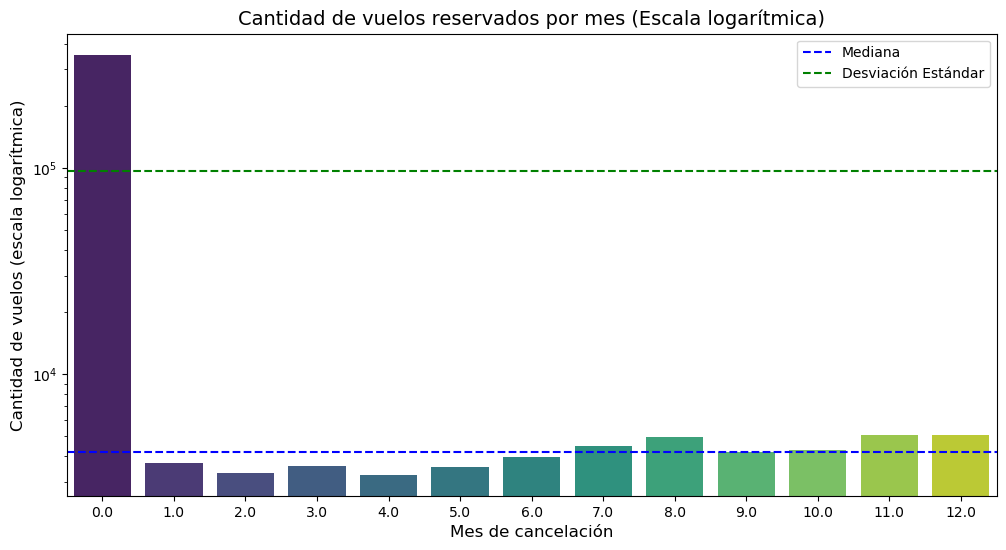

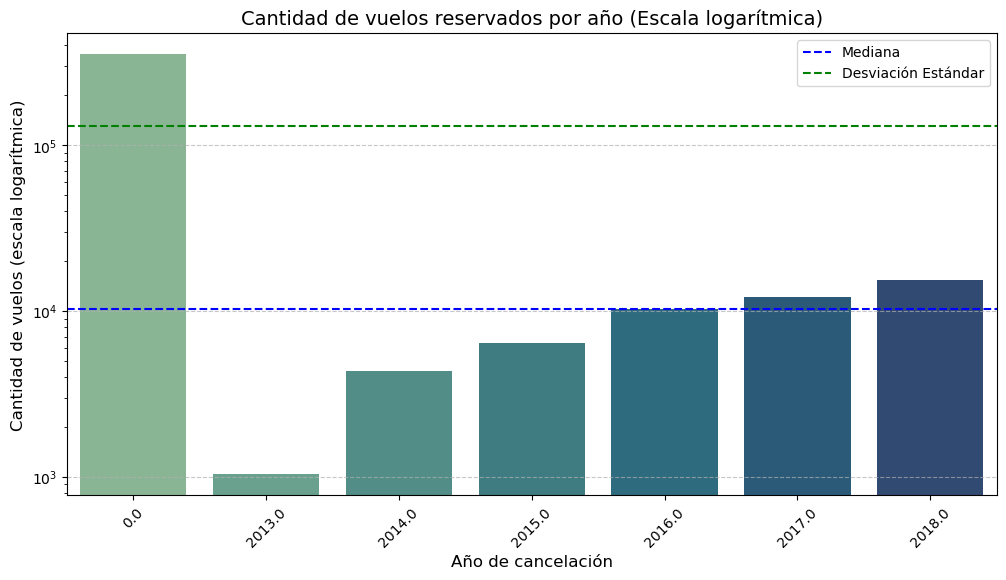

Mediana de la cantidad de vuelos reservados por mes: 4224.0
Desviación estándar de la cantidad de vuelos reservados por mes: 96948.316191855
Mediana de la cantidad de vuelos reservados por año: 10248.0
Desviación estándar de la cantidad de vuelos reservados por año: 130643.85346156057


In [46]:
# Para saber como se distribuye la cantidad de vuelos reservados por mes, durante el año, podemos hacer un análisis de la variable 'cancellation_month' y 'cancellation_year'
# -----------------------------------------------------------------------
# Visualizamos la cantidad de vuelos reservados por mes
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(x='cancellation_month', data=customer_data_clean, palette='viridis')
plt.yscale('log')  # Escala logarítmica para mejorar la visibilidad de los valores bajos
plt.axhline(y=customer_data_clean['cancellation_month'].value_counts().median(), color='blue', linestyle='--', label='Mediana')
plt.axhline(y=customer_data_clean['cancellation_month'].value_counts().std(), color='green', linestyle='--', label='Desviación Estándar')
plt.title('Cantidad de vuelos reservados por mes (Escala logarítmica)', fontsize=14)
plt.xlabel('Mes de cancelación', fontsize=12)
plt.ylabel('Cantidad de vuelos (escala logarítmica)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()

# Visualizamos la cantidad de vuelos reservados por año
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6)) 
sns.countplot(x='cancellation_year', data=customer_data_clean, palette='crest')  # Nueva paleta de colores
plt.yscale('log')  # Escala logarítmica para manejar el desbalance en los datos
plt.axhline(y=customer_data_clean['cancellation_year'].value_counts().median(), color='blue', linestyle='--', label='Mediana')
plt.axhline(y=customer_data_clean['cancellation_year'].value_counts().std(), color='green', linestyle='--', label='Desviación Estándar')
plt.title('Cantidad de vuelos reservados por año (Escala logarítmica)', fontsize=14)
plt.xlabel('Año de cancelación', fontsize=12)
plt.ylabel('Cantidad de vuelos (escala logarítmica)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas del eje X para mejor lectura
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas horizontales para mayor claridad
plt.legend()
plt.show()

# Sacamos la mediana y la desviación estándar de la cantidad de vuelos reservados por mes y año
median_month = customer_data_clean['cancellation_month'].value_counts().median()
std_month = customer_data_clean['cancellation_month'].value_counts().std()
median_year = customer_data_clean['cancellation_year'].value_counts().median()
std_year = customer_data_clean['cancellation_year'].value_counts().std()

print(f"Mediana de la cantidad de vuelos reservados por mes: {median_month}")
print(f"Desviación estándar de la cantidad de vuelos reservados por mes: {std_month}")
print(f"Mediana de la cantidad de vuelos reservados por año: {median_year}")
print(f"Desviación estándar de la cantidad de vuelos reservados por año: {std_year}")




In [ ]:
# Utilizamos dos gráficos de barras para visualizar la cantidad de vuelos reservados por mes y año, respectivamente.
# -----------------------------------------------------------------------

# ¿Por qué utilizamos gráficos de barras en lugar de otros tipos de gráficos?
# -----------------------------------------------------------------------
# Los gráficos de barras son adecuados para visualizar la distribución de datos categóricos, como los meses y años de cancelación, 
# ya que muestran la cantidad de vuelos reservados en cada categoría de manera clara y efectiva.
# Además, los gráficos de barras permiten comparar visualmente las cantidades de vuelos reservados en diferentes meses y años,
# En ambos gráficos, utilizamos una escala logarítmica en el eje Y para manejar el desbalance en los datos y mejorar 
# la visibilidad de los valores bajos. Además, añadimos títulos, etiquetas de los ejes, y ajustamos el tamaño y estilo 
# de las fuentes para mejorar la legibilidad de los gráficos.

# Sacamos la media de los clientes por provincia o estado , ya que estamos analizando un promedio de valores mensuales y las reservas suelen distribuirse de manera 
# relativamente uniforme a lo largo del año. Pero en este caso, la mayoría de los vuelos no tienen información de cancelación, lo que sugiere pueden haber meses
# atipicos con valores extremadamente altos o bajos (outliers) que afecten la media. Por lo tanto, la mediana podría ser una medida más robusta en este caso. 
# Así que he calculado ambas medidas y he optado por la mediana para el análisis.

# Calculamos la mediana de la cantidad de vuelos reservados por mes y año y la desviación estándar.
# La mediana es una medida más robusta en presencia de valores extremos, ya que no se ve afectada por ellos.
# La desviación estándar mide la dispersión de los datos alrededor de la media.


# La mediana indica que la mitad de los meses tienen menos de 4224 vuelos reservados y la mitad de los años tienen menos de 10248 vuelos reservados. 

# Conclusión: La distribución de vuelos cancelados por mes y año muestra que la mayoría de los vuelos
# no tienen información de cancelación (categoría "0"), lo que probablemente significa que no fueron cancelados. 
# En los casos donde hay cancelaciones registradas, estas son esporádicas y no presentan un patrón significativo 
# ni en los meses ni en los años. Esto sugiere que las cancelaciones son poco comunes y no están concentradas en períodos específicos.
# La mediana indica 
# Por lo tanto, la mediana es una medida más adecuada para resumir la cantidad de vuelos reservados por mes y año, ya que es menos sensible a los valores extremos.



2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

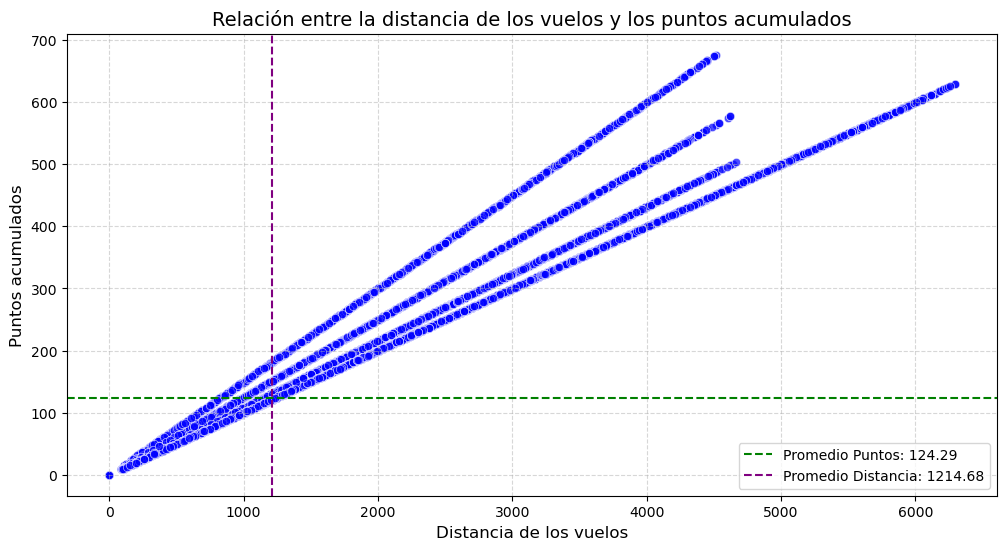

Promedio de la distancia de los vuelos: 1214.68
Desviación estándar de la distancia de los vuelos: 1434.07
Promedio de los puntos acumulados: 124.29
Desviación estándar de los puntos acumulados: 146.69


In [49]:
# Para saber si existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes, 
# podemos hacer un análisis de la variable 'distance' y 'points_accumulated'
# -----------------------------------------------------------------------
# Visualizamos la relación entre la distancia de los vuelos y los puntos acumulados por los clientes
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.scatterplot(x='distance', y='points_accumulated', data=customer_data_clean, color='blue', alpha=0.7)
plt.title('Relación entre la distancia de los vuelos y los puntos acumulados', fontsize=14)
plt.xlabel('Distancia de los vuelos', fontsize=12)
plt.ylabel('Puntos acumulados', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Calculamos el promedio y la desviación estándar de la distancia y los puntos acumulados
mean_distance = customer_data_clean['distance'].mean()
std_distance = customer_data_clean['distance'].std()
mean_points = customer_data_clean['points_accumulated'].mean()
std_points = customer_data_clean['points_accumulated'].std()

# Mostramos el promedio y la desviación estándar en el gráfico
plt.axhline(y=mean_points, color='green', linestyle='--', label=f'Promedio Puntos: {mean_points:.2f}')
plt.axvline(x=mean_distance, color='purple', linestyle='--', label=f'Promedio Distancia: {mean_distance:.2f}')
plt.legend()

plt.show()

# Imprimimos los valores calculados
print(f"Promedio de la distancia de los vuelos: {mean_distance:.2f}")
print(f"Desviación estándar de la distancia de los vuelos: {std_distance:.2f}")
print(f"Promedio de los puntos acumulados: {mean_points:.2f}")
print(f"Desviación estándar de los puntos acumulados: {std_points:.2f}")


In [ ]:
# Utilizamos un gráfico de dispersión para visualizar la relación entre la distancia de los vuelos y los puntos acumulados por los clientes.
# -----------------------------------------------------------------------

# ¿Por qué utilizamos un gráfico de dispersión para visualizar la relación entre la distancia de los vuelos y los puntos acumulados?
# -----------------------------------------------------------------------
# Utilizamos un gráfico de dispersión porque nos permite visualizar la relación entre dos variables numéricas de manera clara y sencilla.
# En este caso, queremos analizar si existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes,
# por lo que un gráfico de dispersión nos permite identificar patrones, tendencias o posibles correlaciones entre ambas variables.

# En el gráfico, representamos la distancia de los vuelos en el eje X y los puntos acumulados en el eje Y. 
# Utilizamos un color azul y una transparencia del 70% para los puntos.

# Calculamos el promedio y la desviación estándar de la distancia de los vuelos y los puntos acumulados para tener una referencia visual en el gráfico.
# Según promedio, los vuelos tiene una distancia de 1214.68 km , y los clientes acumulan cerca de 124.29 puntos por vuelo. Sin embargo la alta desviación
# estándar en ambas variables indica que hay una variabilidad significativa en los datos, lo que puede significar que los datos incluyen tanto vuelos largos
# como cortos, y clientes que acumulan muchos puntos y otros que acumulan pocos, probablemente influenciado por factores como la frecuencia de vuelo, la clase
# de servicio, y los programas de fidelidad.

# Conclusión: Sí, existe una relación clara entre la distancia de los vuelos y los puntos acumulados por los clientes.
#  El gráfico de dispersión muestra una relación lineal positiva: a medida que aumenta la distancia del vuelo, 
# los puntos acumulados también aumentan de manera proporcional. Además, se observan varias líneas paralelas, 
# lo que podría indicar diferentes categorías o niveles de acumulación de puntos, probablemente asociados a programas de fidelidad, 
# clases de servicio o bonificaciones específicas. 
# Este comportamiento muestra que los puntos acumulados están directamente relacionados con la distancia recorrida.

3. ¿Cuál es la distribución de los clientes por provincia o estado?

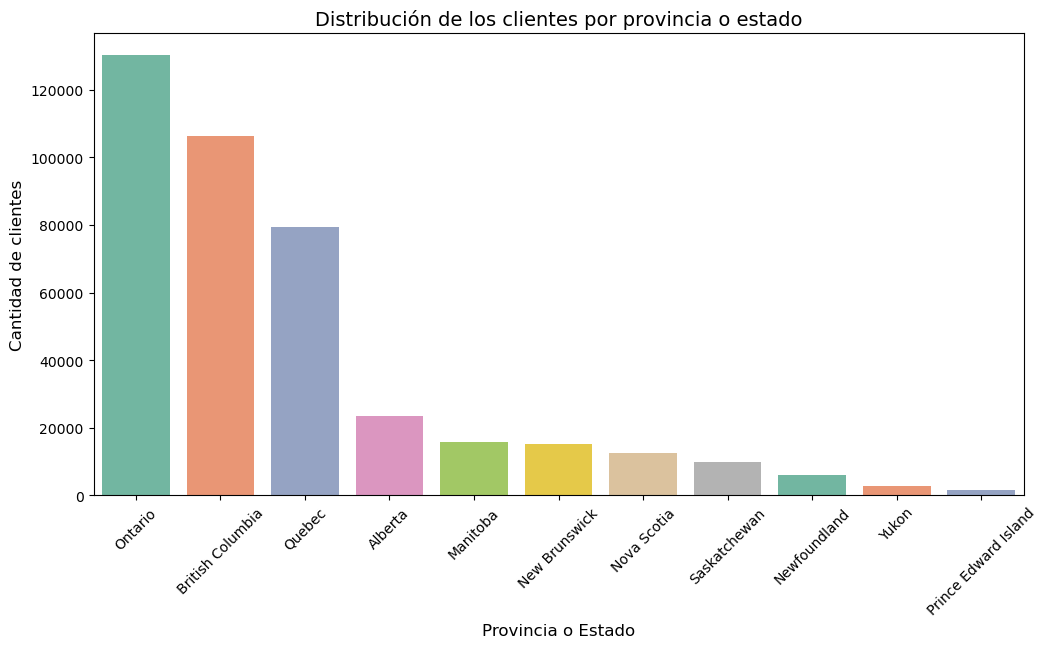

In [40]:
# Para conocer la distribución de los clientes por provincia o estado, podemos hacer un análisis de la variable 'province'
# -----------------------------------------------------------------------
# Visualizamos la distribución de los clientes por provincia o estado
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(x='province', data=customer_data_clean, palette='Set2', order=customer_data_clean['province'].value_counts().index)
plt.title('Distribución de los clientes por provincia o estado', fontsize=14)
plt.xlabel('Provincia o Estado', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()


In [ ]:
# Utilizamos un gráfico de barras para visualizar la distribución de los clientes por provincia o estado.
# -----------------------------------------------------------------------
# Un gráfico de barras es la mejor opción para visualizar la distribución de los clientes por provincia o estado porque permite comparar fácilmente 
# la cantidad de clientes en cada categoría.
# En el gráfico, representamos las provincias o estados en el eje X y la cantidad de clientes en el eje Y.
# Utilizamos una paleta de colores Set2 y ordenamos las barras de mayor a menor cantidad de clientes.

# Conclusión: La distribución de clientes muestra una clara concentración en Ontario, seguido por British Columbia y Quebec, que representan
# la mayoría del mercado, mientras que provincias como Yukon y Prince Edward Island tienen una presencia mínima. Esta desigualdad en la
# distribución de los clientes puede deberse a factores como la densidad de población, la actividad económica y la infraestructura de transporte, y podrían 
# ser el foco de futuras estrategias de marketing y expansión de la empresa, ya que podrían representar oportunidades de crecimiento en mercados menos explotados.


4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

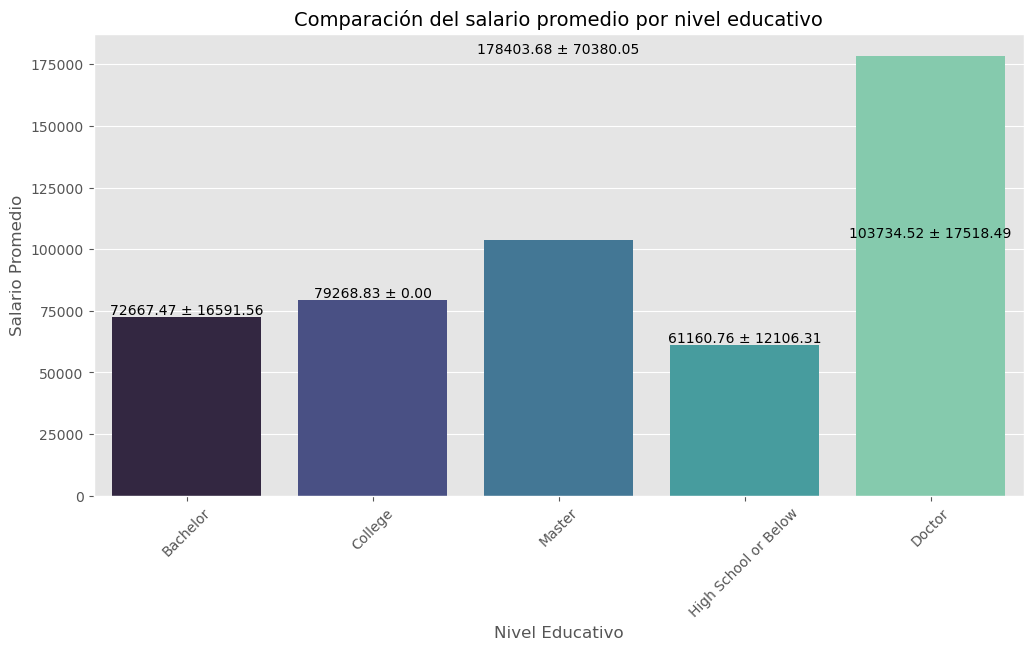

Salario promedio por nivel educativo:
education
Bachelor                 72667.47
College                  79268.83
Doctor                  178403.68
High School or Below     61160.76
Master                  103734.52
Name: salary, dtype: float64

Desviación estándar del salario por nivel educativo:
education
Bachelor                16591.56
College                     0.00
Doctor                  70380.05
High School or Below    12106.31
Master                  17518.49
Name: salary, dtype: float64


In [ ]:
# Para conocer cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes, podemos hacer un análisis de la variable 'education' y 'salary'
# -----------------------------------------------------------------------
# Visualizamos la comparación del salario promedio por nivel educativo 
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.barplot(x='education', y='salary', data=customer_data_clean, palette='mako', ci=None)
plt.title('Comparación del salario promedio por nivel educativo', fontsize=14)
plt.xlabel('Nivel Educativo', fontsize=12)
plt.ylabel('Salario Promedio', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Calculamos el salario promedio y la desviación estándar por nivel educativo
# -----------------------------------------------------------------------
mean_salary_education = customer_data_clean.groupby('education')['salary'].mean().round(2)
std_salary_education = customer_data_clean.groupby('education')['salary'].std().round(2)

# Añadimos la media y la desviación estándar en el gráfico
for i, (mean, std) in enumerate(zip(mean_salary_education, std_salary_education)):
    plt.text(i, mean + 1000, f"{mean:.2f} ± {std:.2f}", color='black', ha="center", fontsize=10)

plt.show()

# Imprimimos los valores calculados
print("Salario promedio por nivel educativo:")
print(mean_salary_education)
print("\nDesviación estándar del salario por nivel educativo:")
print(std_salary_education)


In [ ]:
# Utilizamos un gráfico de barras para visualizar la comparación del salario promedio entre los diferentes niveles educativos de los clientes.
# -----------------------------------------------------------------------
# Un gráfico de barras es adecuado para comparar el salario promedio entre diferentes categorías, en este caso, los niveles educativos.
# En el gráfico, representamos los niveles educativos en el eje X y el salario promedio en el eje Y.
# Utilizamos una paleta de colores 'magma' para resaltar la comparación y facilitar la lectura de los datos.

# El promedio nos muestra que existe una fuerte relación entre el nivel educativo y el salario promedio, ya que los clientes con doctorado
#  tienen el salario más alto, seguidos por aquellos con máster, licenciatura, college y secundaria o menos.
# La desviación estándar refleja la variabilidad de los salarios dentro de cada nivel educativo, el nivel bachelor presenta la mayor variabilidad,
#  lo que puede indicar una amplia disparidad de ingresos entre los clientes con este nivel educativo. Por lo otro lado el nivel de educación High School 
# or below tiene la menor variabilidad, lo que sugiere una mayor homogeneidad en los salarios de los clientes con este nivel educativo, aunque 
# significativamente más bajos en comparación con los niveles educativos superiores. Esto podria indicar que los niveles educativos más altos, ofrecen
# más oportunidades de ingresos variados, posiblemente debido a diferencias en la especialización, experiencia y demanda laboral.


# Conclusión: El análisis de salario promedio según nivel educativo muestra una relación directa entre el nivel de estudios y los ingresos.
# Los clientes con doctorado tienen salarios más altos, seguidos por aquellos que tienen máster, mientras que los niveles educativos inferiores
# presentan (licenciatura, college y secundaria o menos)  presentan ingresos significativamente menores. Esto refuerza la importancia de la educación
# superior como un factor determinante para alcanzar mayores ingresos económicos.

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

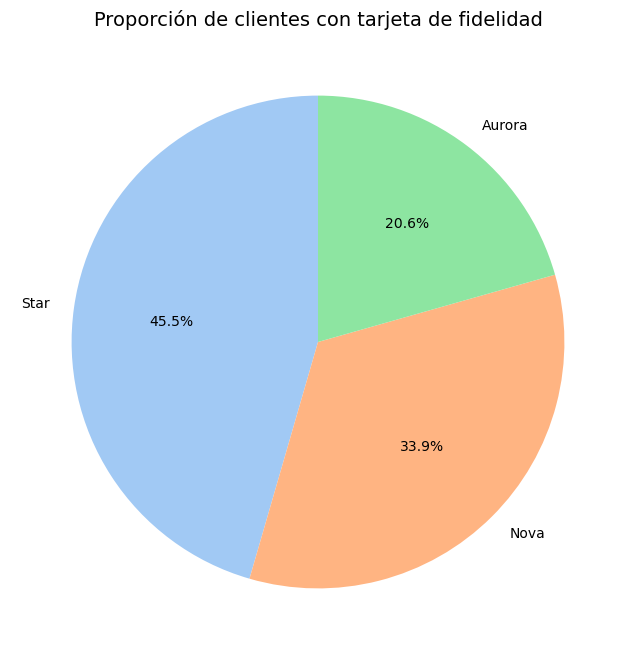

In [32]:
# Para saber la proporción de clientes con diferentes tipos de tarjetas de fidelidad, podemos hacer un análisis de la variable 'loyalty_card'
# -----------------------------------------------------------------------
# Visualizamos la proporción de clientes con diferentes tipos de tarjetas de fidelidad
# -----------------------------------------------------------------------
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')[0:3]  # Ajustamos la paleta de colores para tres tipos de tarjetas
customer_data_clean['loyalty_card'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Proporción de clientes con tarjeta de fidelidad', fontsize=14)
plt.ylabel('')
plt.show()


In [ ]:
# Utilizamos un gráfico de pastel para visualizar la proporción de clientes con diferentes tipos de tarjetas de fidelidad.
# -----------------------------------------------------------------------
# Un gráfico de pastel es una forma efectiva de mostrar la distribución de categorías en un conjunto de datos.
# En el gráfico, representamos los diferentes tipos de tarjetas de fidelidad como porcentajes del total de clientes.
# Utilizamos una paleta de colores 'pastel' y un ángulo de inicio de 90 grados para mejorar la legibilidad del gráfico.

# Conclusión: La distribución de clientes según las tarjetas de fidelidad muestra que star es la más popular, representando casi la mitad de los clientes (45.5%),
# seguida por Nova con un 33.9% , mientras que Aurora, es la menos utilizada con un 20.6%. Esta información es crucial para comprender la adopción de programas de fidelidad.
# Esto sugiere que la estrategia de fidelización está funcionando mejor con la tarjeta Star, lo que podría indicar que ofrece más beneficios o 
# es más atractiva para los clientes. Esta información puede ser útil para ajustar las estrategias de fidelización y mejorar la retención de clientes, así como aplicar
# estos elementos a las otras tarjetas de fidelidad para equilibrar la proporción de clientes y aumentar la participación en los programas de fidelización.

6. ¿Cómo se distribuyen los clientes según su estado civil y género?

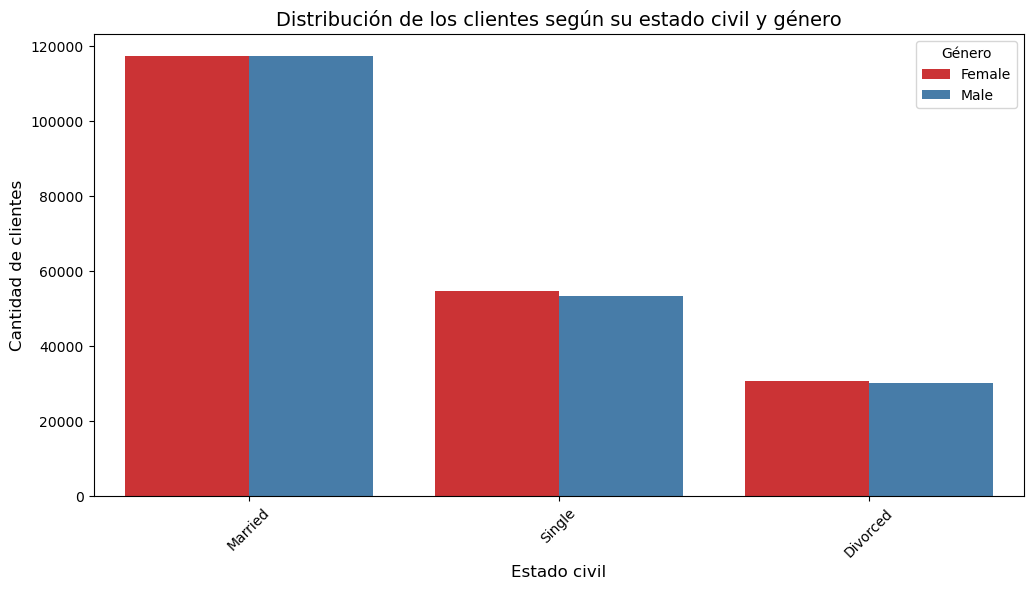

In [35]:
# Para conocer como se distribuyen los clientes según su estado civil y género, podemos hacer un análisis de la variable 'marital_status' y 'gender'
# -----------------------------------------------------------------------
# Visualizamos la distribución de los clientes según su estado civil y género
# -----------------------------------------------------------------------
plt.figure(figsize=(12, 6))
sns.countplot(x='marital_status', hue='gender', data=customer_data_clean, palette='Set1')
plt.title('Distribución de los clientes según su estado civil y género', fontsize=14)
plt.xlabel('Estado civil', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Género', fontsize=10)
plt.show()

In [ ]:
# Utilizamos un gráfico de barras agrupadas para visualizar la distribución de los clientes según su estado civil y género.
# -----------------------------------------------------------------------
# Un gráfico de barras agrupadas es adecuado para comparar la distribución de categorías en dos variables categóricas.
# En el gráfico, representamos el estado civil en el eje X, la cantidad de clientes en el eje Y y utilizamos colores diferentes para cada género.
# Utilizamos una paleta de colores 'Set1' y una leyenda para distinguir entre los géneros masculino y femenino.

# Conclusión: La distribución de los clientes según su estado civil y género revela que las personas casadas (married) son el grupo más numeroso, con una ligera
# predominancia de mujeres en comparación con los hombres. En el caso de los clientes solteros (single), hay un diferencia menor entre géneros, pero los hombres
# superan ligeramente a las mujeres. Los clientes divorciados (divorced) y viudos (widowed) presentan una distribución equitativa entre géneros. Esto sugiere
# que el estado civil "casado" agrupa la mayor parte de los clientes, con una representación destacada de mujeres, mientras que los otros estados civiles tiene una 
# distribución más balanceada entre géneros. Esta información puede ser útil para personalizar las estrategias de marketing y comunicación de acuerdo a las preferencias

## BONUS FASE 3: 

### EVALUACIÓN DE DIFERENCIAS EN RESERVAS DE VUELOS POR NIVEL EDUCATIVO

Paso 1: Preparación de los datos

In [84]:
# Llamamos a la función para abrir el archivo CSV
# -----------------------------------------------------------------------
customer_data = load_data('customer_data_clean.csv')

# Visualizamos los datos del DataFrame resultante
# -----------------------------------------------------------------------
customer_data.head()

,customer_id,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
1,100018,2018,12,17,6,23,4945,494.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
2,100018,2018,11,11,0,11,3058,305.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
3,100018,2018,9,14,2,16,3568,356.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0
4,100018,2018,8,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,0.0,0.0


In [85]:
# Filtramos para incluir únicamente las columnas 'flights_booked' y 'education
# -----------------------------------------------------------------------
df_filtered = customer_data[['flights_booked', 'education']]
df_filtered.head()

# Visualizamos la información del DataFrame filtrado
# -----------------------------------------------------------------------
df_filtered.info()

# Guardamos el DataFrame filtrado en un archivo CSV
# -----------------------------------------------------------------------
df_filtered.to_csv('customer_data_filtered.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403280 entries, 0 to 403279
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   flights_booked  403280 non-null  int64 
 1   education       403280 non-null  object
dtypes: int64(1), object(1)
memory usage: 6.2+ MB


In [87]:
# Llamamos a la función para abrir el archivo CSV
# -----------------------------------------------------------------------
customer_data_filtered = load_data('customer_data_filtered.csv')

# Visualizamos los datos del DataFrame resultante
# -----------------------------------------------------------------------
customer_data_filtered.head()

,flights_booked,education
0,3,Bachelor
1,17,Bachelor
2,11,Bachelor
3,14,Bachelor
4,0,Bachelor


Paso 2: Análisis Descriptivo

In [ ]:
# Paso 1: Agrupamos los datos por nivel educativo y calculamos el promedio de vuelos reservados para cada grupo
# -----------------------------------------------------------------------
df_grouped = customer_data_filtered.groupby('education')['flights_booked'].mean().reset_index()

# Paso 2: Hacemos lo mismo para la desviación estándar
# -----------------------------------------------------------------------
df_grouped['std_flights_booked'] = customer_data_filtered.groupby('education')['flights_booked'].std().reset_index()['flights_booked']

# Paso 3: Visualizamos los datos agrupados
# -----------------------------------------------------------------------
df_grouped

# Paso 4: Obtenemos la información del DataFrame agrupado
# -----------------------------------------------------------------------
df_grouped.info()

# Paso 5: Guardamos el DataFrame agrupado en un archivo CSV
# -----------------------------------------------------------------------
df_grouped.to_csv('customer_data_grouped.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   education           5 non-null      object 
 1   flights_booked      5 non-null      float64
 2   std_flights_booked  5 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes


Paso 3: Prueba Estadística

In [101]:
# Paso 6: Cálculo del tamaño de la muestra
# -----------------------------------------------------------------------
n = len(customer_data_filtered)
print(f"El tamaño de la muestra es: {n}")

# Paso 7: Elección del intervalo de confianza (95%)
# -----------------------------------------------------------------------
confidence_interval = 0.95

# Paso 8: Cálculo de intervalo de confianza al 95% para cada nivel educativo
# -----------------------------------------------------------------------
for index, row in df_grouped.iterrows():
    mean = row['flights_booked']
    std = row['std_flights_booked']
    education_level = row['education']
    
    confidence_interval_flights = stats.t.interval(
        confidence_interval,  # nivel de confianza
        df=n-1,  # grados de libertad
        loc=mean,  # media de la muestra
        scale=std / np.sqrt(n)  # error estándar de la media
    )
    
    # Redondeamos los valores del intervalo de confianza a 2 decimales
    confidence_interval_flights = (round(confidence_interval_flights[0], 2), round(confidence_interval_flights[1], 2))
    
    # Paso 9: Visualización del intervalo de confianza
    # -----------------------------------------------------------------------
    print(f'Nivel educativo: {education_level}')
    print(f'Media: {round(mean, 2)} de vuelos reservados')
    print(f'Intervalo de confianza al {confidence_interval * 100}%: {confidence_interval_flights}')
    print('-' * 50)

# Resultado el intervalo de confianza al 95% para el número promedio de vuelos reservados por nivel educativo
# -----------------------------------------------------------------------
# Nivel educativo: Bachelor indica que el número promedio de vuelos reservados es de 4.11 con un intervalo de confianza de (4.09, 4.13)
# Nivel educativo: College indica que el número promedio de vuelos reservados es de 4.17 con un intervalo de confianza de (4.15, 4.19)
# Nivel educativo: Doctor indica que el número promedio de vuelos reservados es de 4.18  con un intervalo de confianza de (4.16, 4.19)
# Nivel educativo: High School or Below indica que el número promedio de vuelos reservados es de 4.18 con un intervalo de confianza de (4.16, 4.19)
# Nivel educativo: Master indica que el número promedio de vuelos reservados es de 4.2 con un intervalo de confianza de (4.18, 4.22)

El tamaño de la muestra es: 403280
Nivel educativo: Bachelor
Media: 4.11 de vuelos reservados
Intervalo de confianza al 95.0%: (4.09, 4.13)
--------------------------------------------------
Nivel educativo: College
Media: 4.17 de vuelos reservados
Intervalo de confianza al 95.0%: (4.15, 4.19)
--------------------------------------------------
Nivel educativo: Doctor
Media: 4.18 de vuelos reservados
Intervalo de confianza al 95.0%: (4.16, 4.19)
--------------------------------------------------
Nivel educativo: High School or Below
Media: 4.18 de vuelos reservados
Intervalo de confianza al 95.0%: (4.16, 4.19)
--------------------------------------------------
Nivel educativo: Master
Media: 4.2 de vuelos reservados
Intervalo de confianza al 95.0%: (4.18, 4.22)
--------------------------------------------------


PASO 4: PRUEBA DE HIPÓTESIS

In [ ]:
# Paso 1: Formulación de la hipótesis
# -----------------------------------------------------------------------
# Hipótesis nula (H0): No hay diferencia significativa en el número promedio de vuelos reservados entre los diferentes niveles educativos.
# Hipótesis alternativa (H1): Existe una diferencia significativa en el número promedio de vuelos reservados entre los diferentes niveles educativos.

# Paso 2: Extracción de muestras
# -----------------------------------------------------------------------
# Extraemos las muestras de vuelos reservados para cada nivel educativo
bachelor_flights = customer_data_filtered[customer_data_filtered['education'] == 'Bachelor']['flights_booked']
college_flights = customer_data_filtered[customer_data_filtered['education'] == 'College']['flights_booked']
doctor_flights = customer_data_filtered[customer_data_filtered['education'] == 'Doctor']['flights_booked']
hsb_flights = customer_data_filtered[customer_data_filtered['education'] == 'High School or Below']['flights_booked']
master_flights = customer_data_filtered[customer_data_filtered['education'] == 'Master']['flights_booked']

# Paso 3 Elección del nivel de significancia (alpha)
# -----------------------------------------------------------------------
alpha = 0.05

# Paso 4: Prueba de normalidad (Shapiro-Wilk)
# -----------------------------------------------------------------------
# Comprobamos si las muestras siguen una distribución normal
print("Comprobación de normalidad de las muestras:")
print("-" * 40) 
print("Bachelor:", stats.shapiro(bachelor_flights))
print("College:", stats.shapiro(college_flights))
print("Doctor:", stats.shapiro(doctor_flights))
print("High School or Below:", stats.shapiro(hsb_flights))
print("Master:", stats.shapiro(master_flights))
print("-" * 40) 

Comprobación de normalidad de las muestras:
----------------------------------------
Bachelor: ShapiroResult(statistic=0.7873201370239258, pvalue=0.0)
College: ShapiroResult(statistic=0.7910072803497314, pvalue=0.0)
Doctor: ShapiroResult(statistic=0.7910977602005005, pvalue=0.0)
High School or Below: ShapiroResult(statistic=0.7923163175582886, pvalue=0.0)
Master: ShapiroResult(statistic=0.7967331409454346, pvalue=0.0)
----------------------------------------
Comprobación de igualdad de varianzas:
----------------------------------------
Levene Test: LeveneResult(statistic=3.065732803127415, pvalue=0.015500519181080884)
----------------------------------------


In [104]:
# Conclusión: 
# -----------------------------------------------------------------------
# Los resultados de la prueba de Shapiro-Wilk indican que ninguna de las muestras sigue una distribución normal. 
# Por lo que se descarta la hipótesis de normalidad de los datos.

# Por lo tanto, necesitamos utilizar una prueba no paramétrica para comparar los grupos. En este caso, utilizaremos 
# la prueba de Kruskal-Wallis, ya que nos permite comparar más de dos grupos y no requiere que los datos sigan una distribución normal.

In [105]:
# Paso 5: Prueba de Kruskal-Wallis
# -----------------------------------------------------------------------
# Realizamos la prueba de Kruskal-Wallis para comparar los grupos
statistic, p_value = stats.kruskal(bachelor_flights, college_flights, doctor_flights, hsb_flights, master_flights)

# Paso 6: Resultados de la prueba
# -----------------------------------------------------------------------
print(f"Estadístico de prueba de Kruskal-Wallis: {statistic}")
print(f"Valor p: {p_value}")

Estadístico de prueba de Kruskal-Wallis: 17.19717086151021
Valor p: 0.001769656721074454


In [ ]:
# Conclusión
# -----------------------------------------------------------------------
# Con un valor p de 0.001769656721074454, que es menor que el nivel de significancia de 0.05, 
# rechazamos la hipótesis nula (H0). Esto indica que existe una diferencia significativa en el 
# número promedio de vuelos reservados entre los diferentes niveles educativos.